C:\Users\chenkeyu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2265: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: array([[[113, 109, 104],
        [120, 119, 115],
        [117, 122, 117],
        ...,
        [240, 235, 226],
        [239, 234, 225],
        [239, 234, 225]],

       [[117, 112, 109],
        [123, 122, 118],
        [116, 117, 113],
        ...,
        [239, 234, 225],
        [242, 237, 228],
        [241, 236, 227]],

       [[137, 132, 131],
        [128, 124, 120],
        [122, 121, 117],
        ...,
        [237, 232, 223],
        [237, 232, 223],
        [238, 233, 224]],

       ...,

       [[ 47,  59,  76],
        [ 49,  60,  79],
        [ 51,  62,  82],
        ...,
        [ 31,  37,  42],
        [ 30,  36,  40],
        [ 26,  31,  34]],

       [[ 37,  47,  64],
        [ 55,  65,  82],
        [ 47,  55,  78],
        ...,
        [ 33,  37,  42],
        [ 29,  36,  39],
        [ 25,  33,  33]],

       [[ 35,  48,  64],
        [ 48,  59,  79],
        [ 39,  48,  71],
        ...,
        [ 23,  30,  34],
        [ 24,  31,  36],
        [ 22,  31,  35]]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

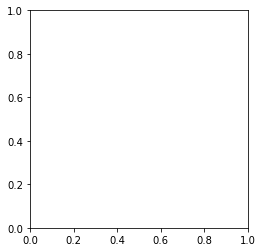

In [1]:
import cv2
import numpy as np
from numpy.random import rand
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

def createTransform(scale=1, angle=0, x=0, y=0, p1=0, p2=0):
    angle = angle/180*np.pi
    return np.array([[scale*np.cos(angle), -scale*np.sin(angle), x ],
                    [scale*np.sin(angle),  scale*np.cos(angle),  y ],
                    [p1, p2, 1]])

def random_perspective_placing(fg, bg):
    bh, bw, _ = bg.shape
    h, w, _ = fg.shape
    dx, dy = np.random.normal(0, 1.8/3, size=2)
    p1, p2 = np.random.normal(0, 0.3/3, size=2)
    a = np.random.rand()*360
    s = np.random.normal(0.4, 0.13 /3)
    bx = np.random.normal(0, bw/3*0.1)
    by = np.random.normal(0, bh/3*0.1)

    DocCent = createTransform(x=-w/2, y=-h/2)
    AS = createTransform(angle=a, scale=2/h)
    T = createTransform(x=dx, y=dy)
    P = createTransform(p1=p1, p2=p2)
    S = createTransform(scale=bh*s)
    BGCent = createTransform(x=bw/2+bx, y=bh/2+by)
    perspective_trans = BGCent@S@P@T@AS@DocCent

    input = cv2.warpPerspective(fg, perspective_trans, (bw, bh), bg, borderMode=cv2.BORDER_TRANSPARENT) 
    
    black = np.zeros((bh, bw))
    pts = np.array([[0,0,1], [w,0,1], [w,h,1], [0,h,1]]).T
    pts = perspective_trans @ pts
    pts = pts[:2, :] / pts[2, :]
    pts = np.int32(pts.T)
    output = cv2.polylines(black, [pts], isClosed=True, color=255, thickness=1)

    return input, output.astype(np.uint8)

def random_cut(img, w, h):
    ih, iw, _ = img.shape
    r1 = int(rand() * (ih-h))
    r2 = r1 + h
    c1 = int(rand() * (iw-w))
    c2 = c1 + w
    return img[r1:r2, c1:c2]

def generate_edge_data(w, h):
    bg_scale = 0.4
    docName = np.floor(rand()*25)
    bgName = np.floor(rand()*397)
    doc = cv2.imread('./raw_dataset/docs/{name:.0f}.jpg'.format(name=docName))
    bg = cv2.imread('./raw_dataset/backgrounds/{name:.0f}.jpg'.format(name=bgName))
    bg = cv2.resize(bg, None, fx=bg_scale, fy=bg_scale)
    bg = random_cut(bg, w, h)
    return random_perspective_placing(doc, bg)

def test(w, h):
    for i in range(10):
        input, output = generate_edge_data(w, h)
        plt.imshow(input)
        plt.show()
        plt.imshow(output, cmap='gray')
        plt.show()

def generate(w, h, start, numb): 
    for i in range(start, start+numb):
        input, output = generate_edge_data(w, h)
        cv2.imwrite("./dataset/x/{i}.jpg".format(i=i), input)
        cv2.imwrite("./dataset/y/{i}.jpg".format(i=i), output)

        sys.stdout.write("\r" + 'Generating Images: {i}.jpg'.format(i=i))
        sys.stdout.flush()
        key = cv2.waitKey(1)
        if key != -1 and key != 255:
            cv2.destroyAllWindows()
            return
    print('finished')

def loadData(split_rate=0.8):
    def parse_files(x_fname, y_fname):
        image_string = tf.io.read_file(x_fname)
        image_decoded = tf.image.decode_jpeg(image_string, channels=3)
        x = tf.cast(image_decoded, tf.float32) / 127.5 - 1

        image_string = tf.io.read_file(y_fname)
        image_decoded = tf.image.decode_jpeg(image_string, channels=1)
        y = tf.cast(image_decoded, tf.float32) / 255.0

        return x, y

    x = tf.data.Dataset.list_files('./dataset/x/*.jpg', shuffle=False)
    x = list(x.as_numpy_iterator())

    y = tf.data.Dataset.list_files('./dataset/y/*.jpg', shuffle=False)
    y = list(y.as_numpy_iterator())

    ds = tf.data.Dataset.from_tensor_slices((x, y))
    ds = ds.shuffle(buffer_size=len(x), seed=123).map(parse_files)
    # ds = ds.prefetch(buffer_size=8)
    print('data size: ' + str(len(x)))

    spliter = int(len(x) * split_rate)
    ds_train = ds.take(spliter)
    ds_test = ds.skip(spliter)
    return ds_train, ds_test

test(w=512, h=512)
# generate(w=512, h=512, start=0, numb=3000)
# read_dataset(numb=3000)
